# AIDM7330 Exploratory Data Visualization Individual Assignment
- Student name: CHIU Sing Yuk
- Student Number: 2043105

- The data is collected and downloaded from HK Government Open data: https://data.gov.hk/en-datasets/format/csv?order=name&file-content=no

## Import data 

In [1]:
#important command to display IMMEDIATELY your plots
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

dseminder = pd.read_csv('../data/' + '2017_HKDSE_analysis_of_results_of_candidates_table5a_en.csv')

## The structure of dataset and the data types
- use these function we can briefly get knowledge of the info of data. For example how much columuns and rows the data has and are there some null values in the data. By the simple overview of the data, we can roughly know how to operate it more efficiently.

In [ ]:
dseminder.head()#show first five row of the table

In [ ]:
dseminder.shape # show the dim of the table 

In [ ]:
dseminder.index # show the index of the table 

In [ ]:
dseminder.columns # show the name of the head of columns

In [ ]:
dseminder.describe()

In [ ]:
dseminder.info() # show infomation of the table including null and data type.

## To compare the difference of the five performance degree between male and female student in a overview

###  to extract the performance information about the total number of male students
- clean the csv data: retain the row containing number type and the row including gender male or female
- then select the rows only that contain total number of male students
- create a list to reserve the number of male students under each performance condition.

In [2]:
dmf = dseminder[(dseminder['Type']=='Number') & ((dseminder['Gender'] == 'Male')|(dseminder['Gender']=='Female'))]
dmfAM = dmf[(dmf['Subject']=='All Category A subjects') & (dmf['Gender']=='Male')]
names = ['Performance -  5**','Performance -  5*','Performance -  5+','Performance -  4+','Performance -  3+','Performance -  2+','Performance -  1+','Performance -  U']
valuesAM = list()
valuesAM.append(dmfAM['Performance -  5**'])
valuesAM.append(dmfAM['Performance -  5*'])
valuesAM.append(dmfAM['Performance -  5+'])
valuesAM.append(dmfAM['Performance -  4+'])
valuesAM.append(dmfAM['Performance -  3+'])
valuesAM.append(dmfAM['Performance -  2+'])
valuesAM.append(dmfAM['Performance -  1+'])
valuesAM.append(dmfAM['Performance -  U'])
valuesAM = list(map(int, valuesAM))

# show the dataframe of the performance of  male students.
dfM = {
    'Performance':names,
    'Num_of_Male_Student':valuesAM
}
pd.DataFrame(dfM)


,Performance,Num_of_Male_Student
0,Performance - 5**,2043
1,Performance - 5*,7468
2,Performance - 5+,17821
3,Performance - 4+,47421
4,Performance - 3+,83930
5,Performance - 2+,122022
6,Performance - 1+,140956
7,Performance - U,9157


###  to extract the performance information about the total number of female students
- then select the rows only that contain total number of male students
- create a list to reserve the number of male students under each performance condition.

In [3]:
dmfAF = dmf[(dmf['Subject']=='All Category A subjects') & (dmf['Gender']=='Female')]
dmfAF.fillna(0)
names = ['Perfrmance -  5**','Performance -  5*','Performance -  5+','Performance -  4+','Performance -  3+','Performance -  2+','Performance -  1+','Performance -  U']
valuesAF = list()
valuesAF.append(dmfAF['Performance -  5**'])
valuesAF.append(dmfAF['Performance -  5*'])
valuesAF.append(dmfAF['Performance -  5+'])
valuesAF.append(dmfAF['Performance -  4+'])
valuesAF.append(dmfAF['Performance -  3+'])
valuesAF.append(dmfAF['Performance -  2+'])
valuesAF.append(dmfAF['Performance -  1+'])
valuesAF.append(dmfAF['Performance -  U'])
valuesAF = list(map(int, valuesAF))

dfF = {
    'Performance':names,
    'Num_of_Female_Student':valuesAF
}
pd.DataFrame(dfF)

,Performance,Num_of_Female_Student
0,Perfrmance - 5**,1882
1,Performance - 5*,7906
2,Performance - 5+,20355
3,Performance - 4+,59773
4,Performance - 3+,100438
5,Performance - 2+,132661
6,Performance - 1+,145447
7,Performance - U,5080


### Visualization of above two dataframes in a bar chart, to see the similarity, difference and trend of the performance about male and female students.
- Above I have sorted data out as what I want it to be and then I need to make it visualized. So by using matplotlib I can make the dataframe into visualization which helps readers to understand it easier.

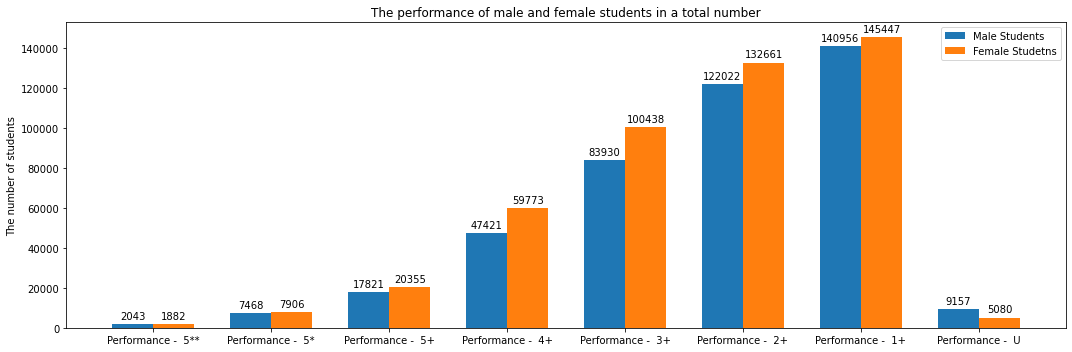

In [6]:
names = ['Performance -  5**','Performance -  5*','Performance -  5+','Performance -  4+','Performance -  3+','Performance -  2+','Performance -  1+','Performance -  U']

x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))

rects1 = ax.bar(x - width/2, valuesAM, width, label='Male Students')
rects2 = ax.bar(x + width/2, valuesAF, width, label='Female Studetns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('The number of students')
ax.set_title('The performance of male and female students in a total number')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## A deeper analysis of male and female students in each performance degree, to see the similarity and difference between them.

In [7]:
import seaborn as sns
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

#### Generate a new data wich limitation that 'Type' = 'Number', 'Gender' = 'Male' and 'Gender' = 'Female'

In [8]:
dmf = dseminder[(dseminder['Type']=='Number') & ((dseminder['Gender'] == 'Male')|(dseminder['Gender']=='Female'))].drop(index = [210, 212])


- Visualize the data to see the performance 5 ** condition of male and female students, especially when the numbers of students bigger than 500.

,Subject,Subject_2,Gender,Performance - 5**
32,Chinese Language,NaN,Female,334
56,English Language,NaN,Female,325
92,Liberal Studies,NaN,Female,319
102,Mathematics,Compulsory Part,Male,550


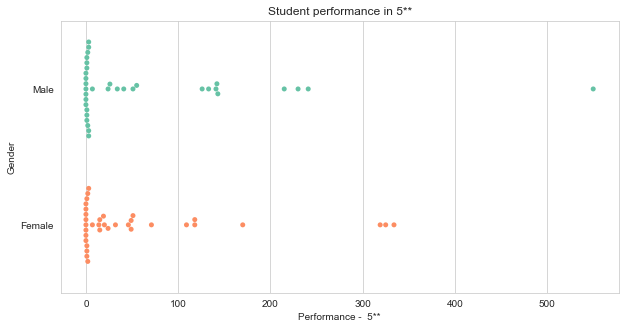

In [11]:
dmf['Performance -  5**']=dmf['Performance -  5**'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  5**", y="Gender", data=dmf, palette='Set2');
#show the name of subject, subject_2, gender and performance degree about students based on visualization.
plt.title('Student performance in 5**')
dmf[dmf['Performance -  5**'] > 300][['Subject', 'Subject_2', 'Gender', 'Performance -  5**']]


- Visualize the data to see the performance 5 * condition of male and female students, especially when the numbers of students bigger than 1000.

,Subject,Subject_2,Gender,Performance - 5*
32,Chinese Language,NaN,Female,1254
56,English Language,NaN,Female,1324
92,Liberal Studies,NaN,Female,1228
102,Mathematics,Compulsory Part,Male,1898


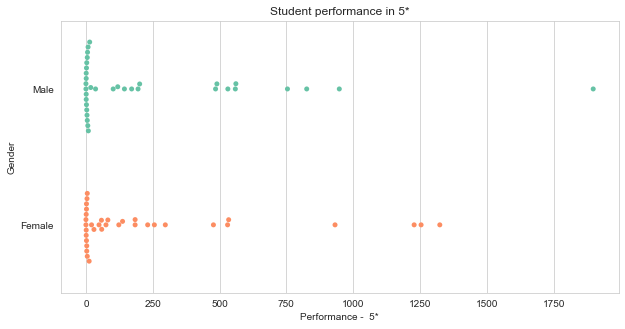

In [12]:
dmf['Performance -  5*']=dmf['Performance -  5*'].astype('int')
dmfCopy = dmf.copy()
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  5*", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in 5*')
dmf[dmf['Performance -  5*'] > 1000][['Subject', 'Subject_2', 'Gender', 'Performance -  5*']]


- Visualize the data to see the Performance -  5+ condition of male and female students, especially when the numbers of students bigger than 3000.

,Subject,Subject_2,Gender,Performance - 5+
32,Chinese Language,NaN,Female,3201
56,English Language,NaN,Female,3116
92,Liberal Studies,NaN,Female,3069
102,Mathematics,Compulsory Part,Male,4367


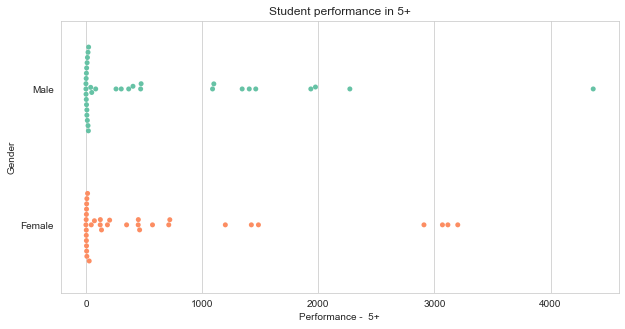

In [13]:
dmf['Performance -  5+']=dmf['Performance -  5+'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  5+", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in 5+')
dmf[dmf['Performance -  5+'] > 3000][['Subject', 'Subject_2', 'Gender', 'Performance -  5+']]


- Visualize the data to see the Performance -  4+ condition of male and female students, especially when the numbers of students bigger than 8000.

,Subject,Subject_2,Gender,Performance - 4+
32,Chinese Language,NaN,Female,9064
56,English Language,NaN,Female,8141
92,Liberal Studies,NaN,Female,11415
102,Mathematics,Compulsory Part,Male,10201
104,Mathematics,Compulsory Part,Female,9472


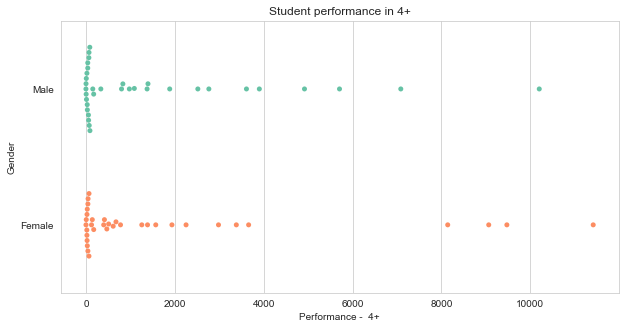

In [14]:
dmf['Performance -  4+']=dmf['Performance -  4+'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  4+", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in 4+')
dmf[dmf['Performance -  4+'] > 8000][['Subject', 'Subject_2', 'Gender', 'Performance -  4+']]


- Visualize the data to see the Performance -  3+ condition of male and female students, especially when the numbers of students bigger than 12500.

,Subject,Subject_2,Gender,Performance - 3+
32,Chinese Language,NaN,Female,16471
56,English Language,NaN,Female,14694
90,Liberal Studies,NaN,Male,14988
92,Liberal Studies,NaN,Female,19191
102,Mathematics,Compulsory Part,Male,14741
104,Mathematics,Compulsory Part,Female,14939


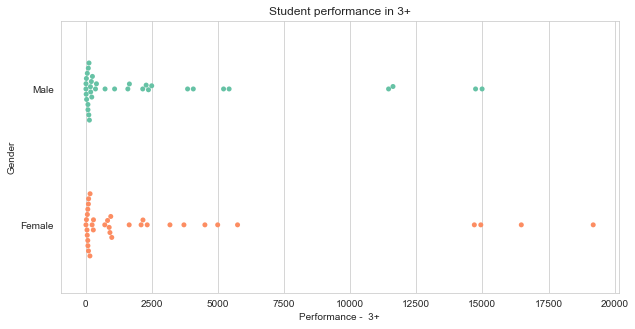

In [15]:
dmf['Performance -  3+']=dmf['Performance -  3+'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  3+", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in 3+')
dmf[dmf['Performance -  3+'] > 12500][['Subject', 'Subject_2', 'Gender', 'Performance -  3+']]


- Visualize the data to see the Performance -  2+ condition of male and female students, especially when the numbers of students bigger than 20000.

,Subject,Subject_2,Gender,Performance - 2+
30,Chinese Language,NaN,Male,20203
32,Chinese Language,NaN,Female,22746
56,English Language,NaN,Female,20796
90,Liberal Studies,NaN,Male,21834
92,Liberal Studies,NaN,Female,23493
102,Mathematics,Compulsory Part,Male,20275
104,Mathematics,Compulsory Part,Female,20497


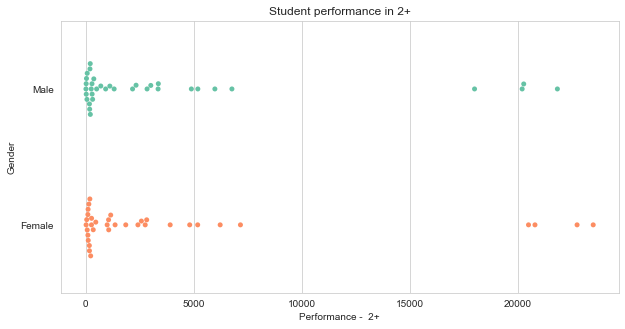

In [16]:
dmf['Performance -  2+']=dmf['Performance -  2+'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  2+", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in 2+')
dmf[dmf['Performance -  2+'] > 20000][['Subject', 'Subject_2', 'Gender', 'Performance -  2+']]


- Visualize the data to see the Performance -  1+ condition of male and female students, especially when the numbers of students bigger than 20000.

,Subject,Subject_2,Gender,Performance - 1+
30,Chinese Language,NaN,Male,24214
32,Chinese Language,NaN,Female,24474
54,English Language,NaN,Male,21918
56,English Language,NaN,Female,23624
90,Liberal Studies,NaN,Male,24864
92,Liberal Studies,NaN,Female,24906
102,Mathematics,Compulsory Part,Male,23321
104,Mathematics,Compulsory Part,Female,23294


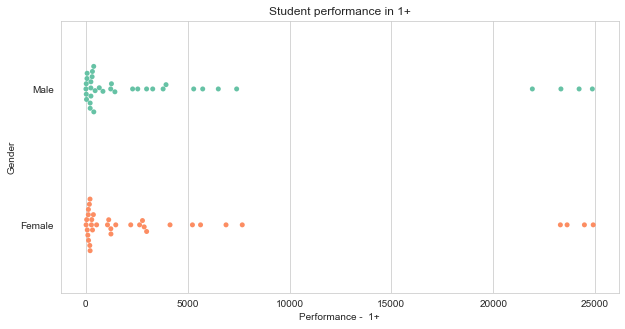

In [17]:
dmf['Performance -  1+']=dmf['Performance -  1+'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  1+", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in 1+')
dmf[dmf['Performance -  1+'] > 20000][['Subject', 'Subject_2', 'Gender', 'Performance -  1+']]


- Visualize the data to see the Performance -  U condition of male and female students, especially when the numbers of students bigger than 3000.

,Subject,Subject_2,Gender,Performance - U
54,English Language,NaN,Male,3373


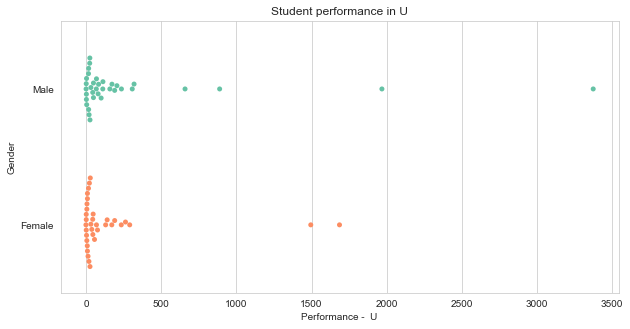

In [18]:
dmf['Performance -  U']=dmf['Performance -  U'].astype('int')
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Performance -  U", y="Gender", data=dmf, palette='Set2');
plt.title('Student performance in U')
dmf[dmf['Performance -  U'] > 3000][['Subject', 'Subject_2', 'Gender', 'Performance -  U']]
